<a href="https://colab.research.google.com/github/Elisjuliaw/tugas/blob/main/Salinan_dari_Untitled25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving xdN11bajEpfF.jpg to xdN11bajEpfF.jpg


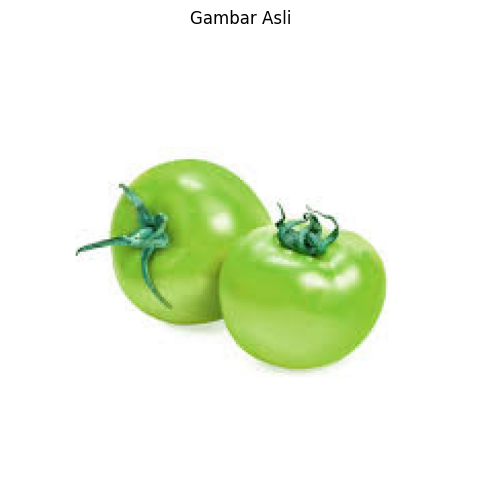

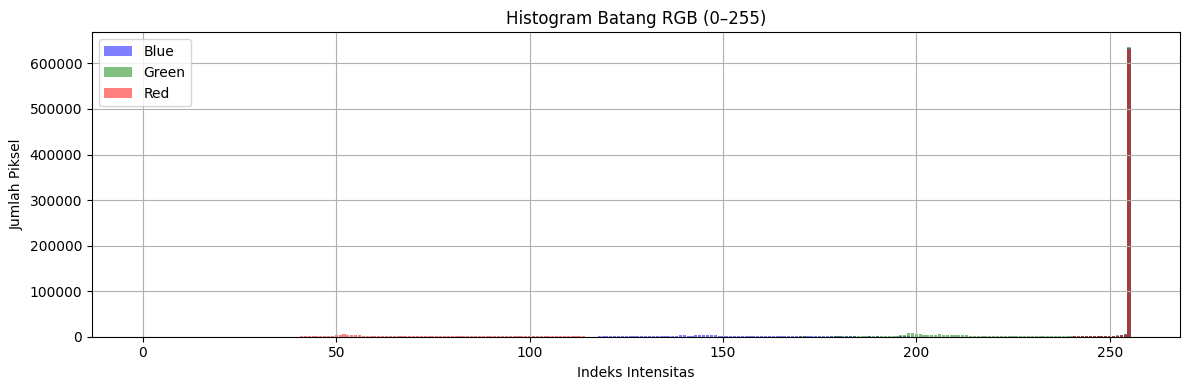

In [ ]:
# Langkah 1: Upload gambar dari user
from google.colab import files
uploaded = files.upload()

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Langkah 2: Baca gambar dari file upload
for filename in uploaded.keys():
    image_stream = BytesIO(uploaded[filename])
    img_pil = Image.open(image_stream).convert('RGB')  # pastikan RGB
    img = np.array(img_pil)

# Langkah 3: Tampilkan gambar asli
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title('Gambar Asli')
plt.axis('off')
plt.show()

# Langkah 4: Hitung histogram RGB (indeks 0–255 untuk masing-masing channel)
color_labels = ['Red', 'Green', 'Blue']
colors = ['r', 'g', 'b']
hist_data = []

plt.figure(figsize=(12, 4))

for i, color in enumerate(colors[::-1]):  # urutan: B, G, R di OpenCV
    hist = cv2.calcHist([img], [i], None, [256], [0, 256]).flatten()
    hist_data.append(hist)

    plt.bar(range(256), hist, color=color, alpha=0.5, label=f'{color_labels[2-i]}')

plt.title('Histogram Batang RGB (0–255)')
plt.xlabel('Indeks Intensitas')
plt.ylabel('Jumlah Piksel')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Saving xdN11bajEpfF.jpg to xdN11bajEpfF (1).jpg


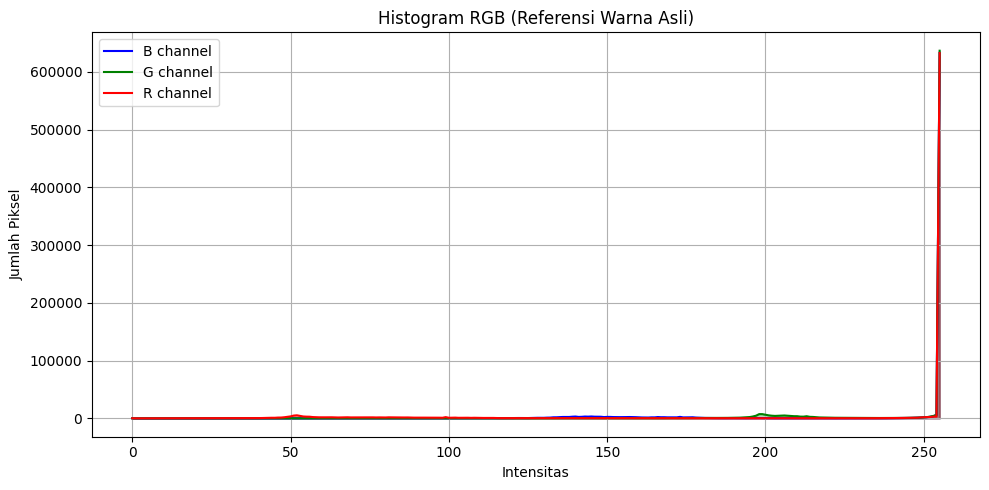

In [ ]:
# Langkah 1: Upload gambar dari komputer
from google.colab import files
uploaded = files.upload()

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Langkah 2: Baca gambar dari upload
for filename in uploaded.keys():
    image_stream = BytesIO(uploaded[filename])
    img_pil = Image.open(image_stream).convert('RGB')  # Pastikan dalam RGB
    img = np.array(img_pil)

# Langkah 3: Hitung histogram untuk masing-masing channel RGB
colors = ('r', 'g', 'b')
plt.figure(figsize=(10, 5))

for i, col in enumerate(colors[::-1]):  # OpenCV menyimpan dalam BGR
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col, label=f'{col.upper()} channel')
    plt.fill_between(range(256), hist.flatten(), color=col, alpha=0.3)

plt.title('Histogram RGB (Referensi Warna Asli)')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Piksel')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Saving xdN11bajEpfF.jpg to xdN11bajEpfF (2).jpg


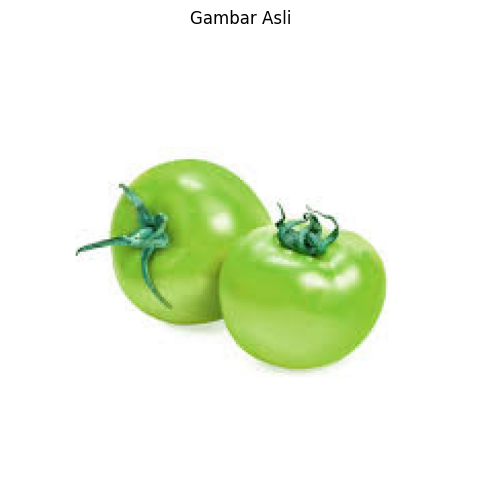

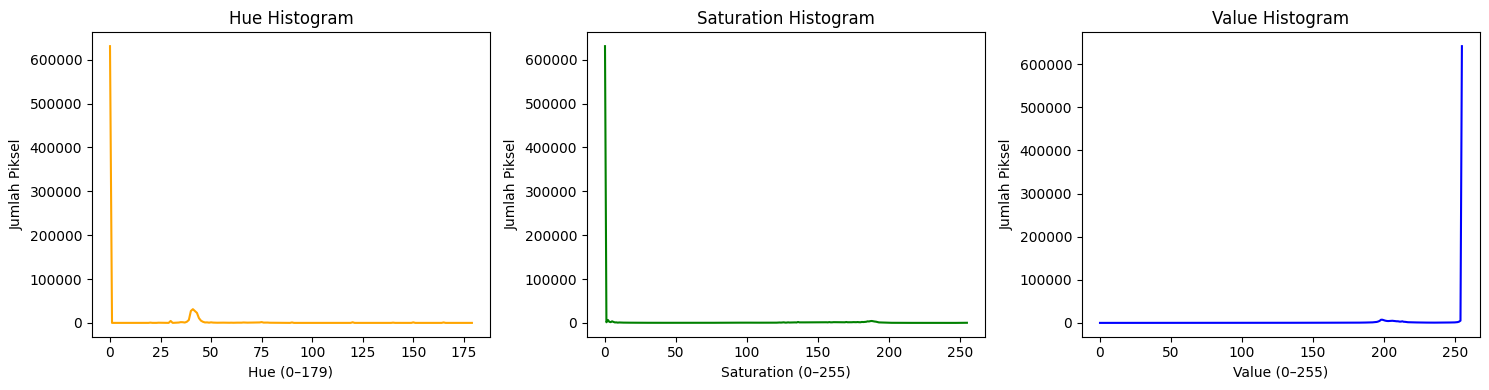

In [ ]:
# Upload gambar dari user
from google.colab import files
uploaded = files.upload()

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Baca gambar dari upload
for filename in uploaded.keys():
    image_stream = BytesIO(uploaded[filename])
    img_pil = Image.open(image_stream).convert('RGB')  # Pastikan RGB
    img = np.array(img_pil)

# Tampilkan gambar asli
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title('Gambar Asli')
plt.show()

# Konversi gambar ke HSV
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Hitung histogram untuk H, S, V (masing-masing channel)
hue_hist = cv2.calcHist([hsv], [0], None, [180], [0, 180])
sat_hist = cv2.calcHist([hsv], [1], None, [256], [0, 256])
val_hist = cv2.calcHist([hsv], [2], None, [256], [0, 256])

# Plot histogram HSV
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(hue_hist, color='orange')
plt.title('Hue Histogram')
plt.xlabel('Hue (0–179)')
plt.ylabel('Jumlah Piksel')

plt.subplot(1, 3, 2)
plt.plot(sat_hist, color='green')
plt.title('Saturation Histogram')
plt.xlabel('Saturation (0–255)')
plt.ylabel('Jumlah Piksel')

plt.subplot(1, 3, 3)
plt.plot(val_hist, color='blue')
plt.title('Value Histogram')
plt.xlabel('Value (0–255)')
plt.ylabel('Jumlah Piksel')

plt.tight_layout()
plt.show()

Saving xdN11bajEpfF.jpg to xdN11bajEpfF (3).jpg


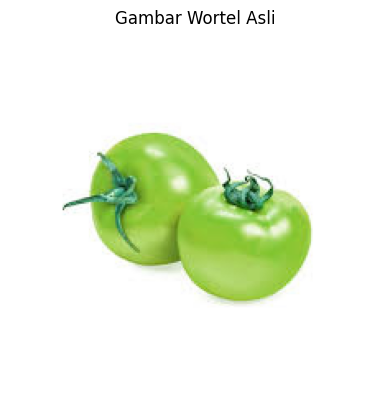

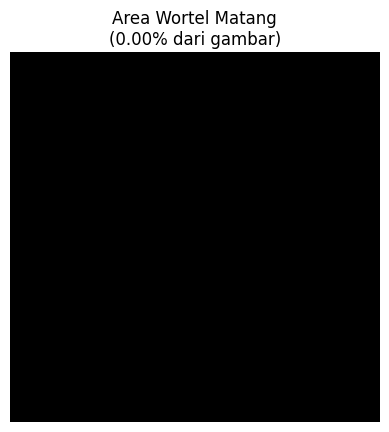

Wortel kemungkinan BELUM matang 🥕❌


In [ ]:
# Upload gambar wortel
from google.colab import files
uploaded = files.upload()

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Baca gambar dari file upload
for filename in uploaded.keys():
    img_pil = Image.open(BytesIO(uploaded[filename])).convert('RGB')
    img = np.array(img_pil)

# Tampilkan gambar asli
plt.imshow(img)
plt.title("Gambar Wortel Asli")
plt.axis("off")
plt.show()

# Konversi ke HSV
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Pisahkan channel
hue = hsv[:, :, 0]  # 0–179
sat = hsv[:, :, 1]  # 0–255
val = hsv[:, :, 2]  # 0–255

# === Buat mask berdasarkan warna matang wortel (oranye kemerahan) ===
# Rentang ini bisa diubah tergantung hasil
lower_orange = np.array([5, 100, 50])   # hue, sat, val (nilai awal threshold)
upper_orange = np.array([25, 255, 255])

# Mask untuk warna matang
mask_matang = cv2.inRange(hsv, lower_orange, upper_orange)

# Hitung proporsi area matang
total_pixels = img.shape[0] * img.shape[1]
matang_pixels = cv2.countNonZero(mask_matang)
persen_matang = (matang_pixels / total_pixels) * 100

# Tampilkan hasil mask
plt.imshow(mask_matang, cmap='gray')
plt.title(f"Area Wortel Matang\n({persen_matang:.2f}% dari gambar)")
plt.axis("off")
plt.show()

# Output evaluasi
if persen_matang > 50:
    print("Wortel kemungkinan SUDAH MATANG 🥕✅")
else:
    print("Wortel kemungkinan BELUM matang 🥕❌")